
# Classification Models with Keras

## Introduction


The <strong>MNIST database</strong>, short for Modified National Institute of Standards and Technology database, is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning.
    
The MNIST database contains 60,000 training images and 10,000 testing images of digits written by high school students and employees of the United States Census Bureau.

Also, this way, you will get to compare how conventional neural networks compare to convolutional neural networks, that we will build in the next module.


## Objectives for this Notebook    
* Use the MNIST database for training various image processing systems
* Build a neural network
* Train and test the network


## Table of Contents
1. <a href="#Import-Keras-and-Packages">Import Keras and Packages</a>      
2. <a href="#Build-a-Neural-Network">Build a Neural Network</a>     
3. <a href="#Train-and-Test-the-Network">Train and Test the Network</a>     

#### Suppress the tensorflow warning messages
We use the following code to  suppress the warning messages due to use of CPU architechture for tensoflow.

You may want to **comment out** these lines if you are using the GPU architechture


In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## Import Keras and Packages


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical

### Import the libraries. 
There might be some warning messages related to floating point round off errors and lack of GPU and other compiler related options. You can ignore these warnings and proceed.


import keras
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.utils import to_categorical

Since we are dealing we images, let's also import the Matplotlib scripting layer in order to view the images.


In [3]:
import matplotlib.pyplot as plt

The Keras library conveniently includes the MNIST dataset as part of its API. You can check other datasets within the Keras library [here](https://keras.io/datasets/). 

So, let's load the MNIST dataset from the Keras library. The dataset is readily divided into a training set and a test set.


In [4]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Let's confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.


In [5]:
X_train.shape

(60000, 28, 28)

The first number in the output tuple is the number of images, and the other two numbers are the size of the images in datset. So, each image is 28 pixels by 28 pixels.


Let's visualize the first image in the training set using Matplotlib's scripting layer.


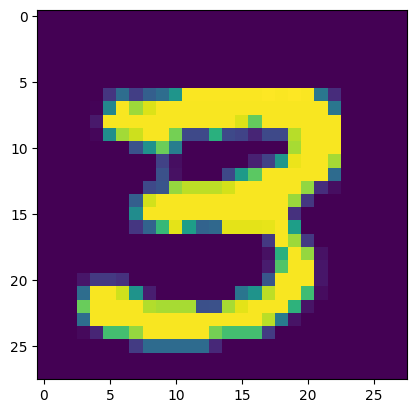

In [6]:
plt.imshow(X_train[111])

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.


In [7]:
# flatten images into one-dimensional vector
num_pixels= X_train.shape[1]* X_train.shape[2]

X_train= X_train.reshape(X_train.shape[0], num_pixels).astype("float32")
X_test= X_test.reshape(X_test.shape[0], num_pixels).astype("float32")

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.


In [8]:
# normalize inputs from 0-255 to 0-1
X_train= X_train/ 255
X_test= X_test/ 255

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.


In [9]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


## Build a Neural Network


In [14]:
# define classification model
def classification_model():
    model= Sequential()
    model.add(Input(shape= (num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Train and Test the Network


In [15]:
model= classification_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)
score= model.evaluate(X_test, y_test, verbose=0)

Epoch 1/10
1875/1875 - 11s - 6ms/step - accuracy: 0.9444 - loss: 0.1865 - val_accuracy: 0.9653 - val_loss: 0.1118
Epoch 2/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9755 - loss: 0.0781 - val_accuracy: 0.9738 - val_loss: 0.0823
Epoch 3/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9832 - loss: 0.0544 - val_accuracy: 0.9732 - val_loss: 0.0863
Epoch 4/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9872 - loss: 0.0389 - val_accuracy: 0.9787 - val_loss: 0.0693
Epoch 5/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9897 - loss: 0.0323 - val_accuracy: 0.9813 - val_loss: 0.0696
Epoch 6/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9917 - loss: 0.0258 - val_accuracy: 0.9735 - val_loss: 0.1079
Epoch 7/10
1875/1875 - 8s - 5ms/step - accuracy: 0.9930 - loss: 0.0215 - val_accuracy: 0.9792 - val_loss: 0.0976
Epoch 8/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9934 - loss: 0.0201 - val_accuracy: 0.9802 - val_loss: 0.0851
Epoch 9/10
1875/1875 - 8s - 5ms/step - accuracy: 0.9943 - loss: 0.0183 - val_accuracy: 0.9801 -

Let's print the accuracy and the corresponding error.


In [16]:
print('Accuracy: {}% \n Error: {}'.format(score[1], 1 - score[1]))        

Accuracy: 0.9804999828338623% 
 Error: 0.019500017166137695


Just running 10 epochs could actually take over 20 minutes. But enjoy the results as they are getting generated.


Sometimes, you cannot afford to retrain your model everytime you want to use it, especially if you are limited on computational resources and training your model can take a long time. Therefore, with the Keras library, you can save your model after training. To do that, we use the save method.


In [17]:
model.save('00.Saved_models/classification_model.keras')

Since our model contains multidimensional arrays of data, then models are usually saved as .keras files.


<h3>Practice Exercise 1</h3>


Create a neural network model with 6 dense layers and compare its accuracy


In [ ]:
def sixlayers_classification_model():

    model= Sequential()
    model.add(Input(shape=(num_pixels,)))
    model.add(Dense(num_pixels, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss= 'categorical_crossentropy', matrics=['accuracy'])
    return model

<h3>Practice Exercise 2</h3>


Now, load the the earlier saved model, train it further for 10 more epochs and check the accuracy


In [20]:
pretrained_model= keras.saving.load_model('00.Saved_models/classification_model.keras')
pretrained_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

scores_20_epochs = pretrained_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy_10_epochs: {}% \n Accuracy_20_epochs: {}'.format(score[1], scores_20_epochs[1])) 

Epoch 1/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9961 - loss: 0.0121 - val_accuracy: 0.9836 - val_loss: 0.0899
Epoch 2/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9951 - loss: 0.0158 - val_accuracy: 0.9823 - val_loss: 0.0943
Epoch 3/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9964 - loss: 0.0124 - val_accuracy: 0.9802 - val_loss: 0.1168
Epoch 4/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9968 - loss: 0.0106 - val_accuracy: 0.9785 - val_loss: 0.1255
Epoch 5/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9964 - loss: 0.0128 - val_accuracy: 0.9811 - val_loss: 0.1096
Epoch 6/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9971 - loss: 0.0105 - val_accuracy: 0.9780 - val_loss: 0.1408
Epoch 7/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9967 - loss: 0.0116 - val_accuracy: 0.9791 - val_loss: 0.1299
Epoch 8/10
1875/1875 - 9s - 5ms/step - accuracy: 0.9975 - loss: 0.0085 - val_accuracy: 0.9785 - val_loss: 0.1414
Epoch 9/10
1875/1875 - 8s - 4ms/step - accuracy: 0.9967 - loss: 0.0136 - val_accuracy: 0.9816 - 